In [3]:
import qiskit as q

circuit = q.QuantumCircuit(2, 2)
circuit.x(0) # Not function
circuit.cx(0, 1) # Controlled not. Compliments the 2nd qubit only if the 1st qubit is 1
circuit.measure([0, 1], [0, 1]) # Measure the value in classical bits
circuit.draw() # ASCII representation of the circuit

In [4]:
from qiskit import IBMQ

IBMQ.save_account("*Insert Token Here*")

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count= "simulated"
        
    print(f"{backend.name()} with {backend.status().pending_jobs} pending jobs and {qubit_count} qubits")

ibmq_qasm_simulator with 0 pending jobs and simulated qubits
ibmqx2 with 9 pending jobs and 5 qubits
ibmq_16_melbourne with 12 pending jobs and 14 qubits
ibmq_vigo with 8 pending jobs and 5 qubits
ibmq_ourense with 12 pending jobs and 5 qubits
ibmq_london with 12 pending jobs and 5 qubits
ibmq_burlington with 3 pending jobs and 5 qubits
ibmq_essex with 32 pending jobs and 5 qubits


In [12]:
from qiskit.tools.monitor import job_monitor

In [17]:
job = q.execute(circuit, backend = provider.get_backend("ibmq_burlington"), shots = 1000)
job_monitor(job)

Job Status: job has successfully run


In [18]:
from qiskit.visualization import plot_histogram

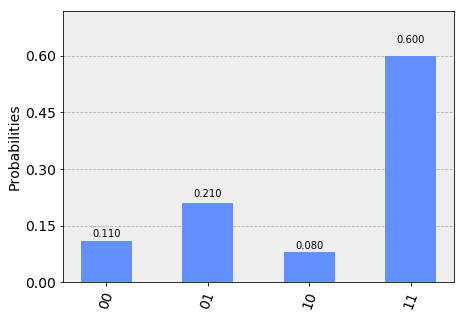

In [19]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

In [21]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0) # Superposition with hadamard gate
circuit.cx(0, 1) # Controlled not. Compliments the 2nd qubit only if the 1st qubit is 1
circuit.measure([0, 1], [0, 1]) # Measure the value in classical bits
circuit.draw() # ASCII representation of the circuit

In [24]:
job = q.execute(circuit, backend = provider.get_backend("ibmq_burlington"), shots = 1000)
job_monitor(job)

Job Status: job has successfully run


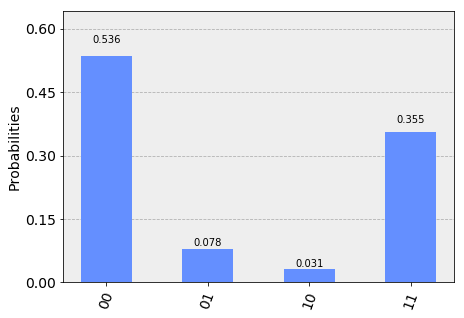

In [25]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])